Please use the dataset, batting.csv that you have been using for your Pandas project to create 5 distinct visualizations.   Please include a markdown cell or a comment to describe what the viz is depicting.  Create clean X and Y labels as well as titles.  Remember you only have 90 mins to complete this assignment so be cognizant of your time.  Try not to create an entire notebook of just line graphs or just histograms.  

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
batting=pd.read_csv('Batting.csv')
batting.head(10)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,Robert,Armstrong,1850,1871,1,FW1,NaN,12,49,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,Al,Barker,1839,1871,1,RC1,NaN,1,4,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,Ross,Barnes,1850,1871,1,BS1,NaN,31,157,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,Bill,Barrett,0,1871,1,FW1,NaN,1,5,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,Frank,Barrows,1844,1871,1,BS1,NaN,18,86,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


#### 1. Display PA of different teams in AL league in 2012

In [13]:
batting_2012=batting[batting['yearID']==2012]
batting_2012_AL=batting_2012[batting_2012['lgID']=='AL']
batting_2012_AL['PA']=batting_2012_AL['AB']+batting_2012_AL['BB']+batting_2012_AL['IBB']+batting_2012_AL['SH']+batting_2012_AL['SF']
batting_2012_AL.head()

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
95595,aardsda01,David,Aardsma,1981,2012,1,NYA,AL,1,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95597,abreubo01,Bobby,Abreu,1974,2012,1,LAA,AL,8,24,...,0.0,0.0,2,5.0,0.0,0.0,0.0,1.0,1.0,27.0
95599,abreuto01,Tony,Abreu,1984,2012,1,KCA,AL,22,70,...,0.0,0.0,2,13.0,0.0,1.0,0.0,1.0,1.0,73.0
95600,accarje01,Jeremy,Accardo,1981,2012,1,CLE,AL,26,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95601,accarje01,Jeremy,Accardo,1981,2012,2,OAK,AL,1,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
batting_2012_AL['teamID'].unique()

array(['NYA', 'LAA', 'KCA', 'CLE', 'OAK', 'BOS', 'SEA', 'TEX', 'DET',
       'TBA', 'TOR', 'BAL', 'CHA', 'MIN'], dtype=object)

In [46]:
PA_AL=pd.DataFrame(batting_2012_AL.groupby(['teamID'])['PA'].sum()).reset_index()
PA_AL

,teamID,PA
0,BAL,6132.0
1,BOS,6148.0
2,CHA,6070.0
3,CLE,6164.0
4,DET,6108.0
5,KCA,6142.0
6,LAA,6102.0
7,MIN,6184.0
8,NYA,6200.0
9,OAK,6167.0


<Container object of 14 artists>

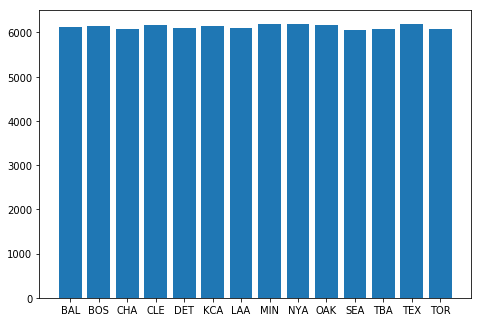

In [48]:
pa = plt.figure()

ax = pa.add_axes([0,0,1,1])

ax.bar(PA_AL['teamID'], PA_AL['PA'])

#### 2. display the average PA in 2012 for different age group

In [37]:
batting_2012['AGE']=batting_2012['yearID']-batting_2012['birthYear']
print('the min age is: ',batting_2012['AGE'].min())
print('the max age is: ',batting_2012['AGE'].max())

the min age is:  19
the max age is:  50


/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
batting_2012['PA']=batting_2012['AB']+batting_2012['BB']+batting_2012['IBB']+batting_2012['SH']+batting_2012['SF']
batting_2012.head()

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AGE,PA
95595,aardsda01,David,Aardsma,1981,2012,1,NYA,AL,1,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,31,0.0
95596,abadfe01,Fernando,Abad,1985,2012,1,HOU,NL,37,7,...,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0,27,7.0
95597,abreubo01,Bobby,Abreu,1974,2012,1,LAA,AL,8,24,...,0.0,2,5.0,0.0,0.0,0.0,1.0,1.0,38,27.0
95598,abreubo01,Bobby,Abreu,1974,2012,2,LAN,NL,92,195,...,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,38,233.0
95599,abreuto01,Tony,Abreu,1984,2012,1,KCA,AL,22,70,...,0.0,2,13.0,0.0,1.0,0.0,1.0,1.0,28,73.0


In [43]:
def age_group(a):
    if a>=19 and a<=25:
        return 'first'
    elif a>=26 and a<=30:
        return 'second'
    elif a>=31 and a<=35:
        return 'third'
    elif a>=36 and a<=40:
        return 'fourth'
    elif a>=41 and a<=45:
        return 'fifth'
    else:
        return 'sixth'
    
    
batting_2012['AGE_GROUP']=batting_2012['AGE'].map(age_group)
# batting_2012.head()

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


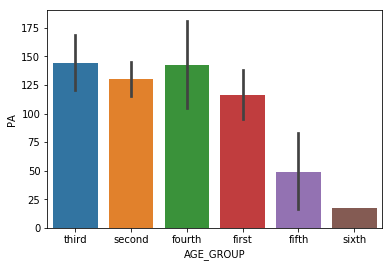

In [44]:
sns.barplot(x='AGE_GROUP',y='PA',data=batting_2012)

#### 3. Hank Aaron's (aaronha01) performance of AB in different years

In [69]:
aaronha01=batting[batting['playerID']=='aaronha01']
aaronha01.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
36873,aaronha01,Hank,Aaron,1934,1954,1,ML1,NL,122,468,...,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0
37449,aaronha01,Hank,Aaron,1934,1955,1,ML1,NL,153,602,...,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0
38104,aaronha01,Hank,Aaron,1934,1956,1,ML1,NL,153,609,...,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0
38725,aaronha01,Hank,Aaron,1934,1957,1,ML1,NL,151,615,...,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0
39340,aaronha01,Hank,Aaron,1934,1958,1,ML1,NL,153,601,...,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0


In [71]:
aaronha01_ab=pd.DataFrame(aaronha01.groupby(['playerID','yearID'])['AB'].sum()).reset_index()
aaronha01_ab.head()

,playerID,yearID,AB
0,aaronha01,1954,468
1,aaronha01,1955,602
2,aaronha01,1956,609
3,aaronha01,1957,615
4,aaronha01,1958,601


Text(0.5,1,'Hank Aaron_at Bats')

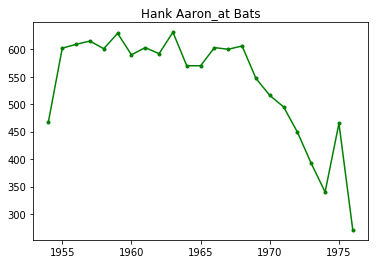

In [74]:
fig, ax = plt.subplots()
ax.plot(aaronha01_ab['yearID'], aaronha01_ab['AB'], 'g.-') 
plt.title('Hank Aaron_at Bats')

#### 4. AB of ANA in different year

In [87]:
batting_AL=batting[batting['lgID']=='AL']
batting_AL.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
8097,anderjo01,John,Anderson,1873,1901,1,MLA,AL,138,576,...,99.0,35.0,NaN,24,NaN,NaN,3.0,4.0,NaN,NaN
8098,bakerbo01,Bock,Baker,1878,1901,1,CLE,AL,1,4,...,0.0,0.0,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN
8099,bakerbo01,Bock,Baker,1878,1901,2,PHA,AL,1,3,...,1.0,0.0,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN
8100,barreji01,Jimmy,Barrett,1875,1901,1,DET,AL,135,542,...,65.0,26.0,NaN,76,NaN,NaN,5.0,7.0,NaN,NaN
8105,becker01,Erve,Beck,1878,1901,1,CLE,AL,135,539,...,79.0,7.0,NaN,23,NaN,NaN,1.0,4.0,NaN,NaN


In [92]:
batting_AL_team=pd.DataFrame(batting_AL.groupby(['teamID','yearID'])['AB'].mean()).reset_index()
batting_AL_team.head()

,teamID,yearID,AB
0,ANA,1997,130.883721
1,ANA,1998,125.111111
2,ANA,1999,122.088889
3,ANA,2000,125.066667
4,ANA,2001,146.078947


In [94]:
#batting_AL_team.pivot_table(values='AB',index='teamID',columns='yearID')

In [96]:
batting_AL_ANA=batting_AL_team[batting_AL_team['teamID']=='ANA']
# batting_AL_ANA.head()

,teamID,yearID,AB
0,ANA,1997,130.883721
1,ANA,1998,125.111111
2,ANA,1999,122.088889
3,ANA,2000,125.066667
4,ANA,2001,146.078947


Text(0.5,1,'ANA at Bats')

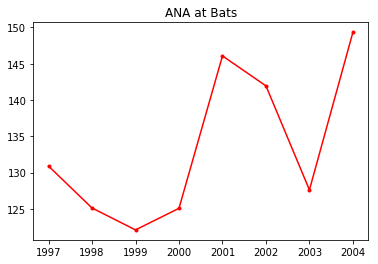

In [97]:
fig, ax = plt.subplots()
ax.plot(batting_AL_ANA['yearID'], batting_AL_ANA['AB'], 'r.-') 
plt.title('ANA at Bats')

#### 5. HEATMAP

In [98]:
batting_1901=batting[batting['yearID']==1901]